# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** sonia vanciska selvia
- **Email:** soniavanciska77@gmail.com
- **ID Dicoding:** soniavs777

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan variabel "weekday" berefek dengan peminjaman sepeda selama tahun 2011 - 2012 ?
- Bagaimana performa perkembangan peminjam sepeda baik secara casual maupun registered selama tahun 2011 hingga tahun 2012 berdasarkan bulan? 

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats.mstats import winsorize

## Data Wrangling

### Gathering Data

In [2]:
df = pd.read_csv('data/hour.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [3]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- data yang akan diolah adalah data peminjaman sepeda per jam selama 2 tahun yaitu dari tahun 2011 hingga tahun 2012
- variabel dalam dataset berjumlah 17 variabel
- tipe data dari varibel tersebut yaitu terdapat 4 varibel bertipe data foat, 12 variabel bertipe data int dan 1 variabel bertipe data object
- jumlah kolom yang berada dalam dataset adalah berjumlah 17379 kolom

### Assessing Data

In [4]:
# cari data hilang 
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
# cek duplikasi data
df.duplicated().sum()

0

In [6]:
# cek inconsisten value 
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
df.head(50)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


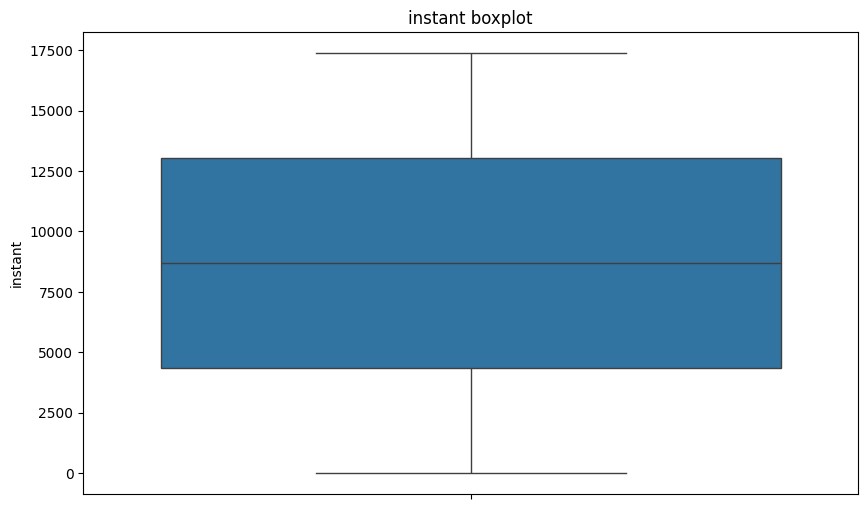

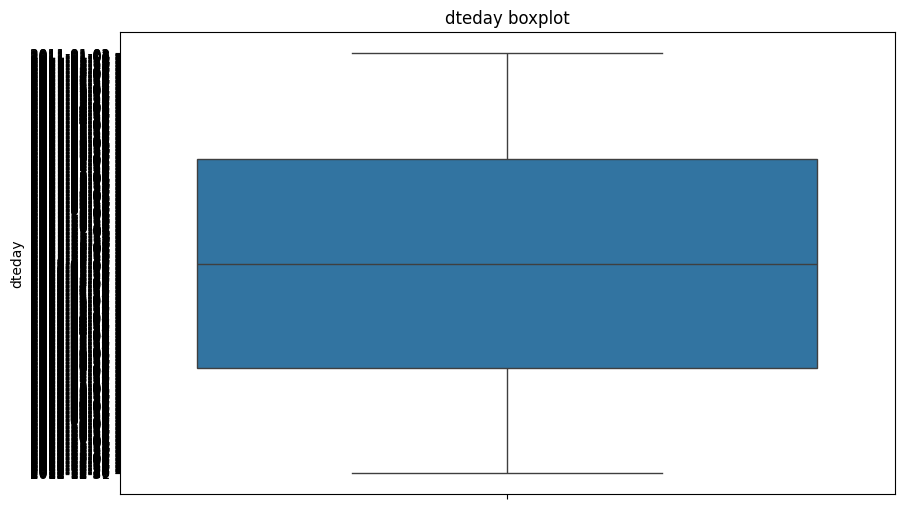

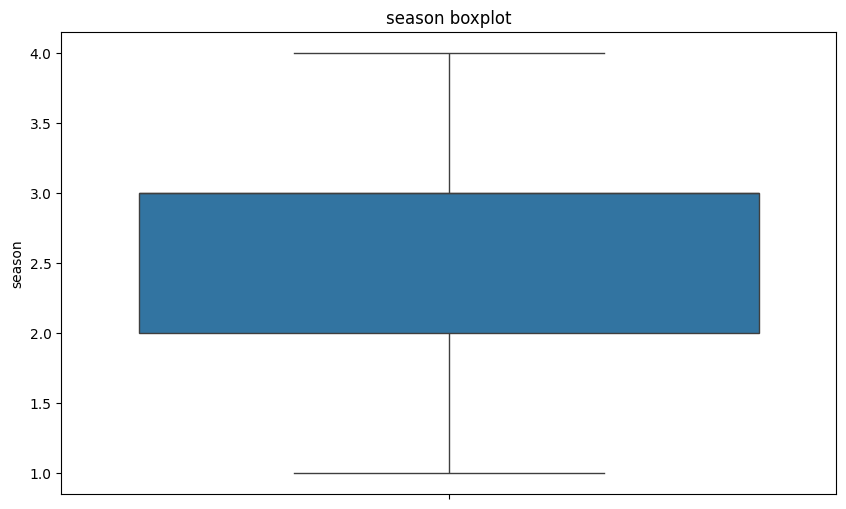

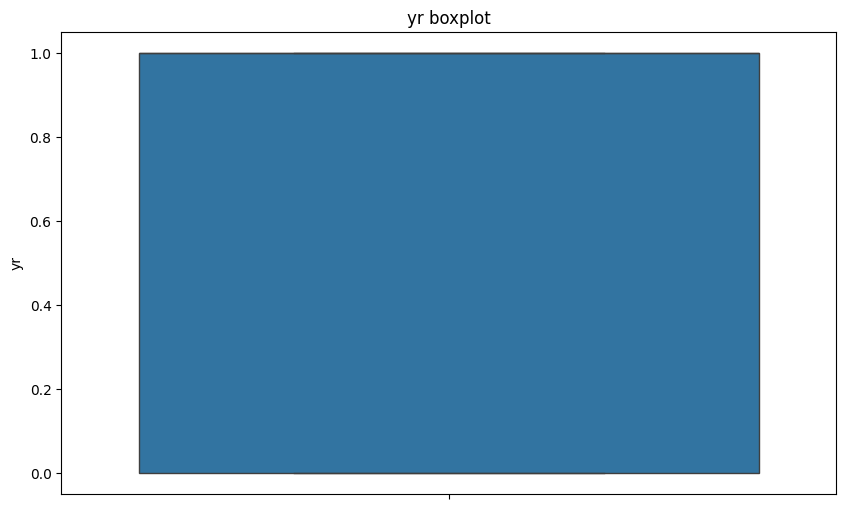

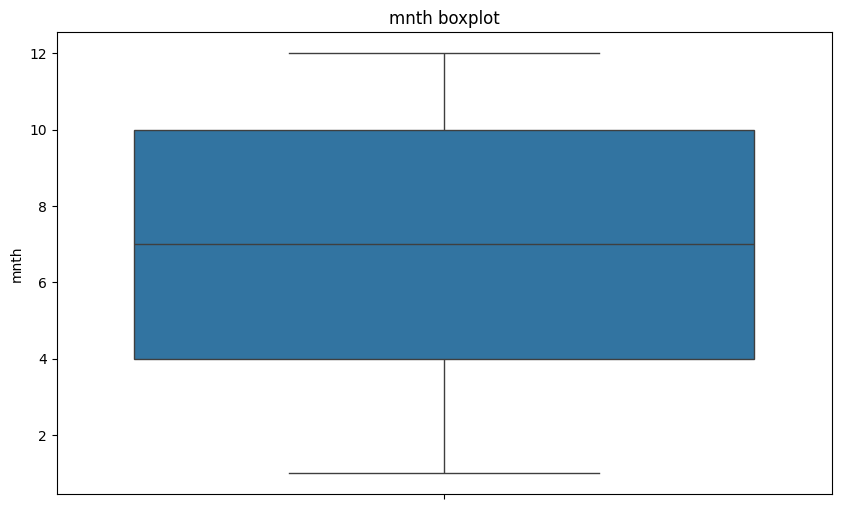

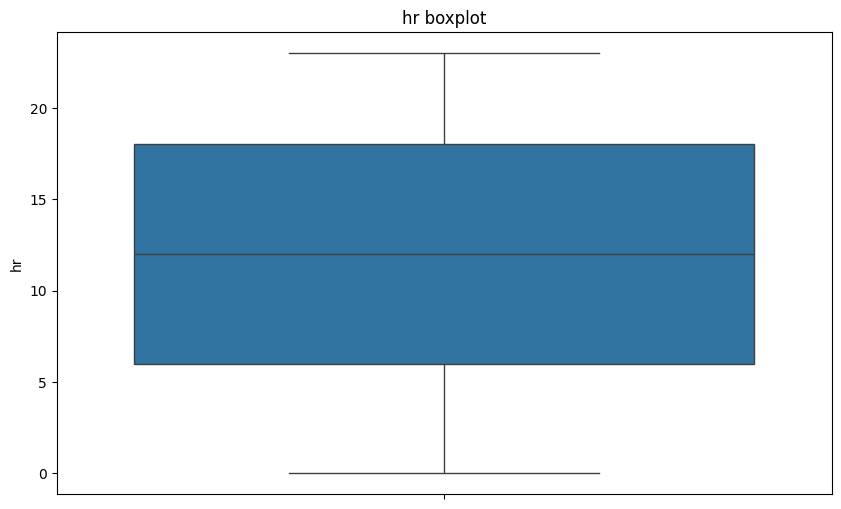

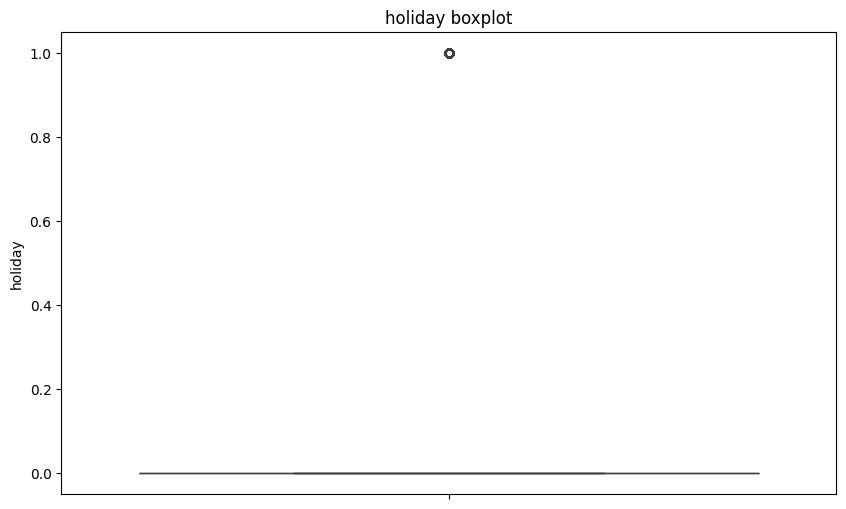

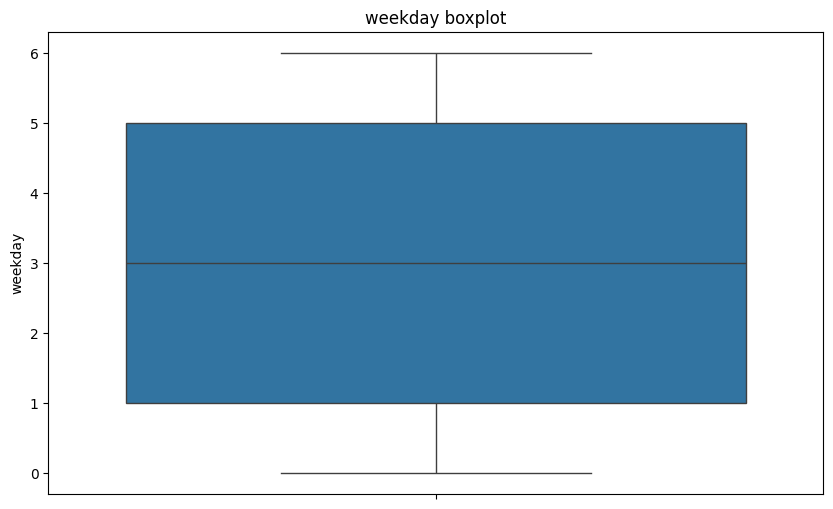

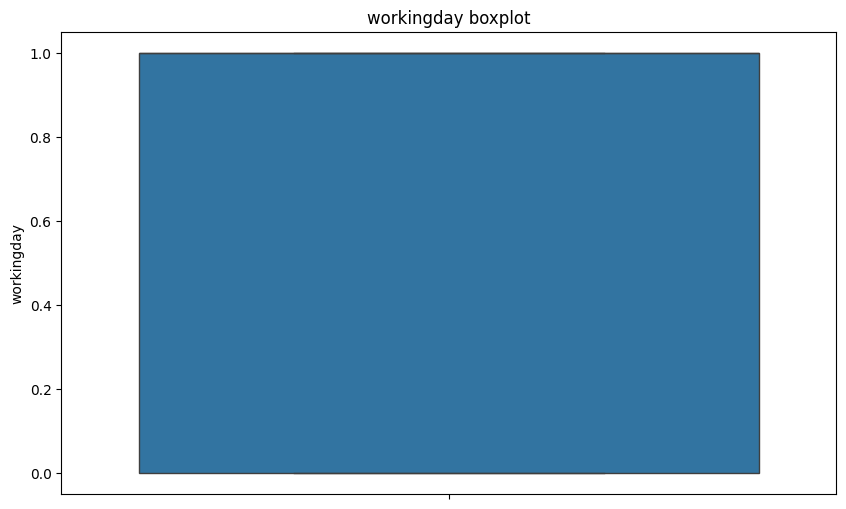

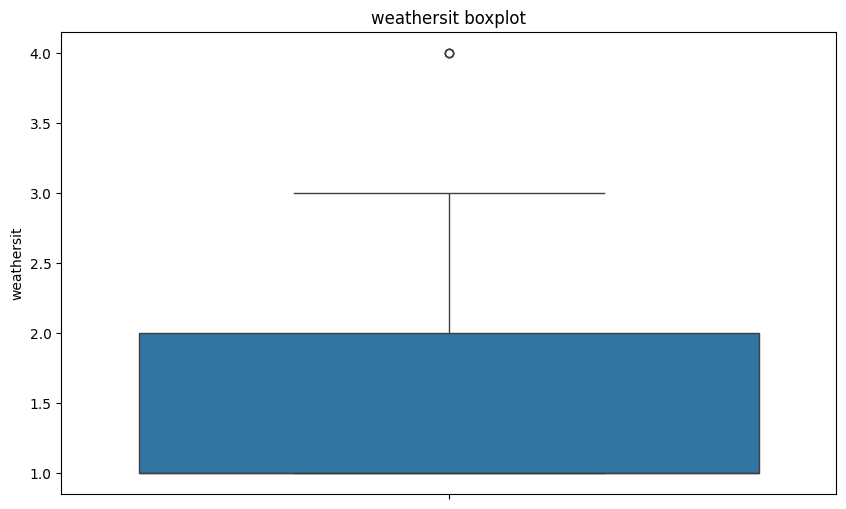

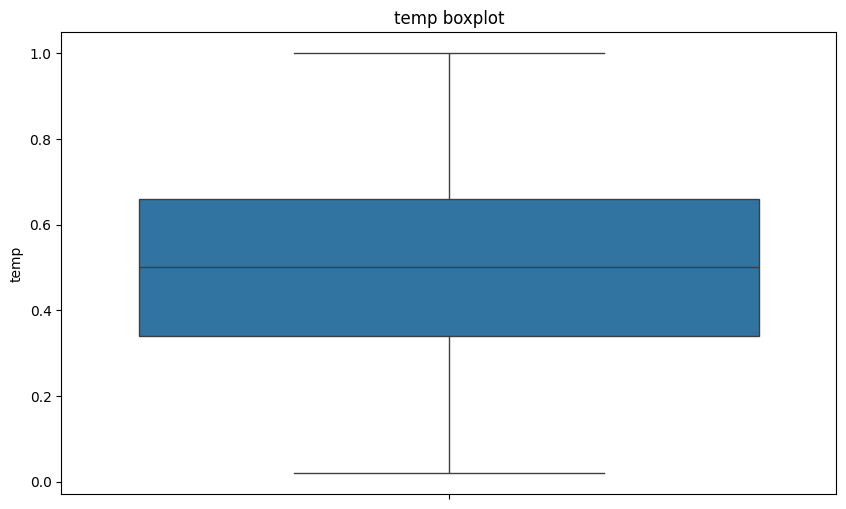

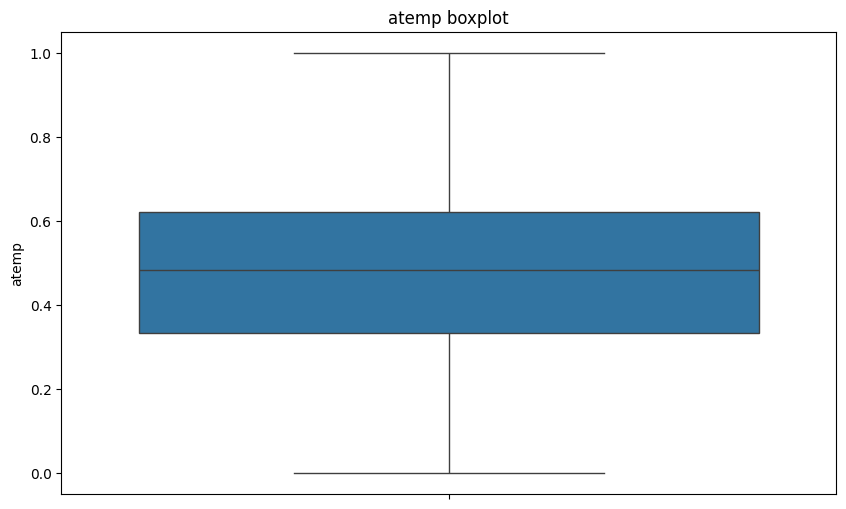

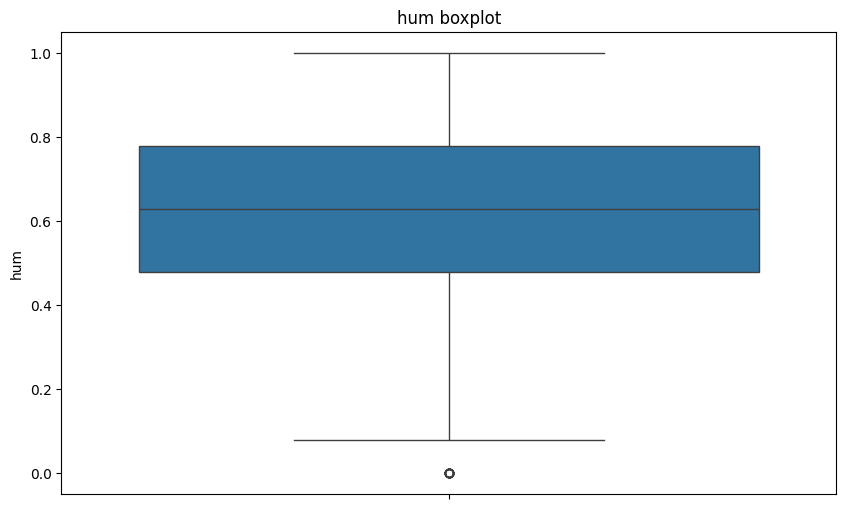

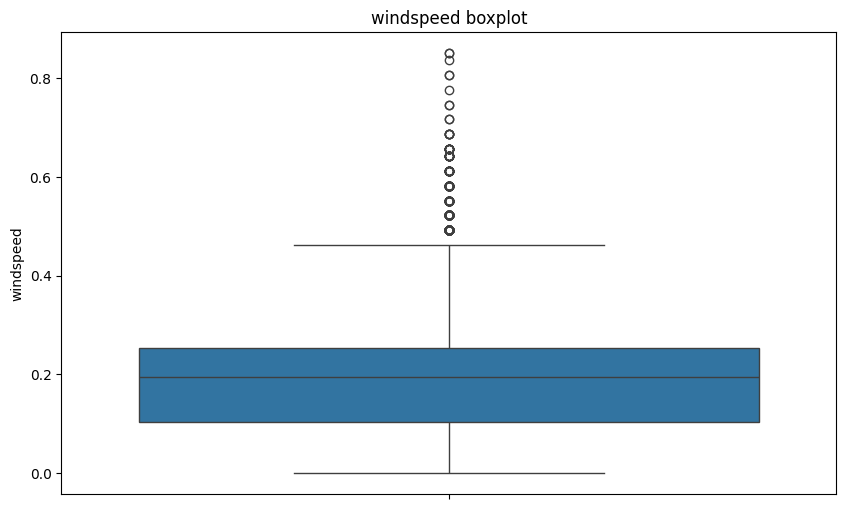

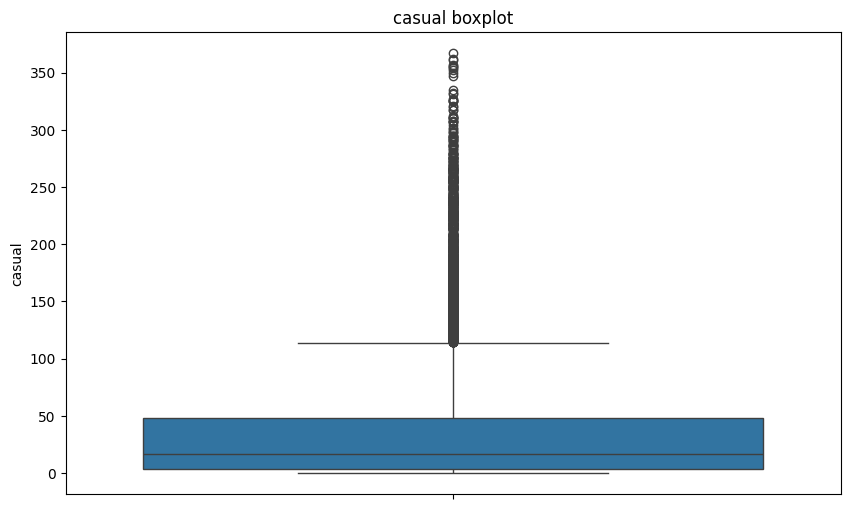

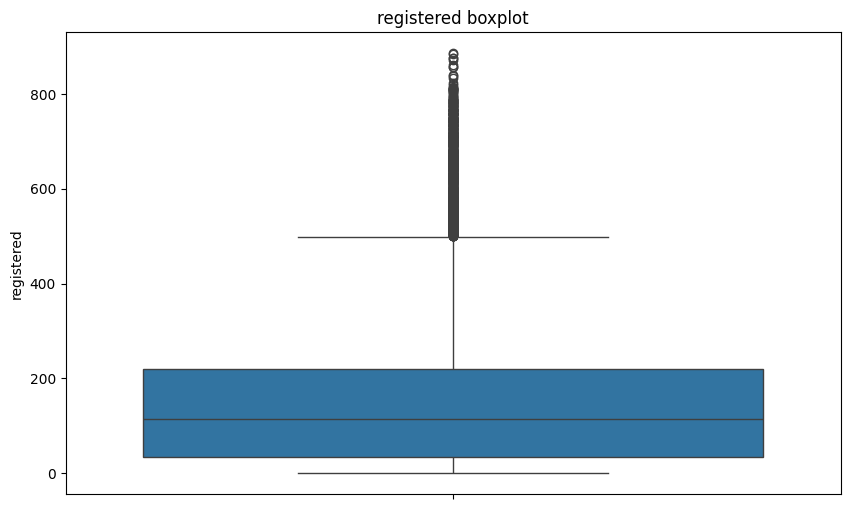

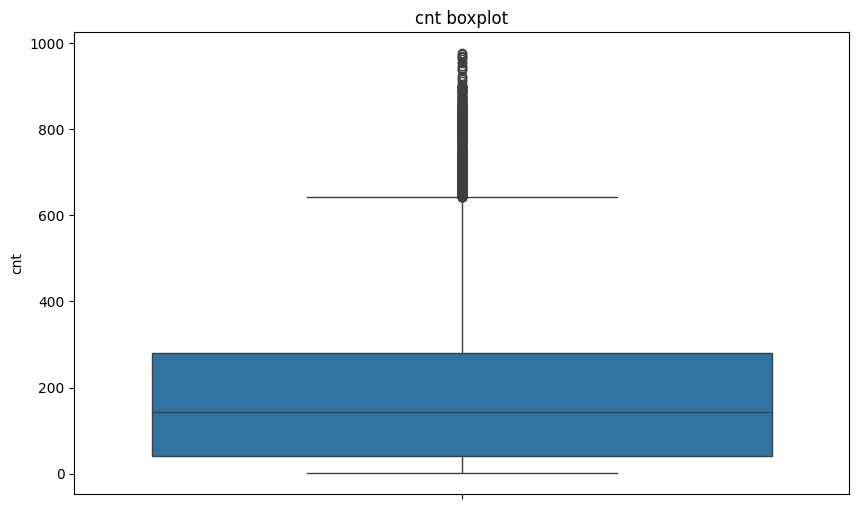

In [8]:
# cek outlier dengan boxplot 
for col in df : 
    plt.figure(figsize =(10,6))
    sns.boxplot(y=df[col])
    plt.title(f"{col} boxplot")
    plt.show()

**Insight:**
- dataset tidak memiliki missing value, dan tidak ada yang terduplikat 
- dataset memiliki inconsisten values yaitu variabel dteday yang memiliki data object
- dataset memiliki beberapa variabel yang memiliki outlier 

### Cleaning Data

In [9]:
# mengubah data yang inconsisten values 
df['dteday'] = pd.to_datetime(df['dteday'])
df.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

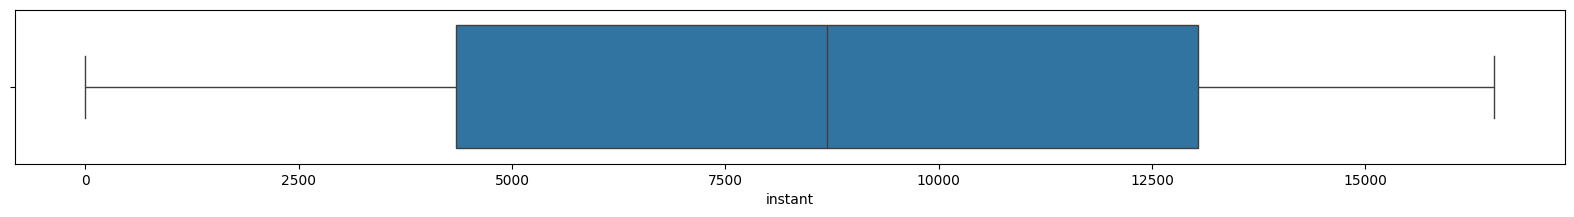

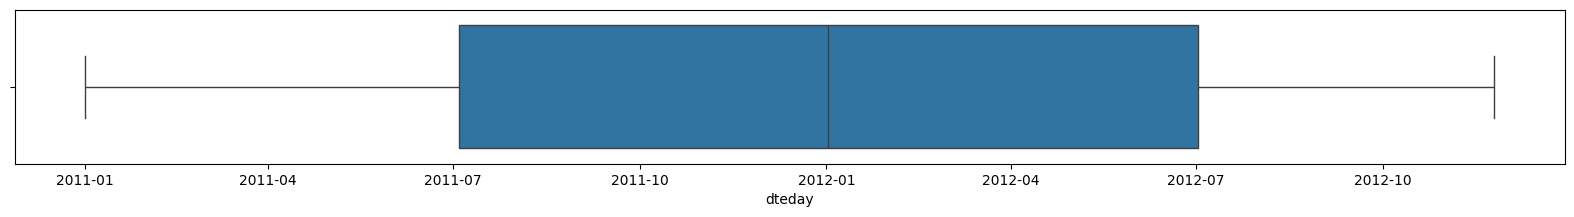

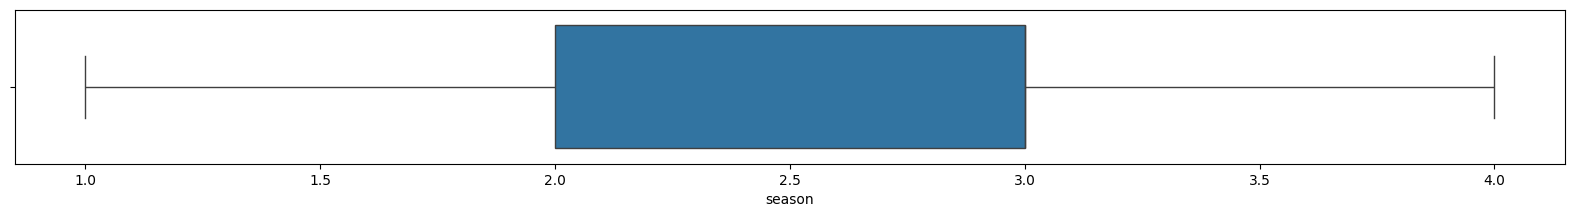

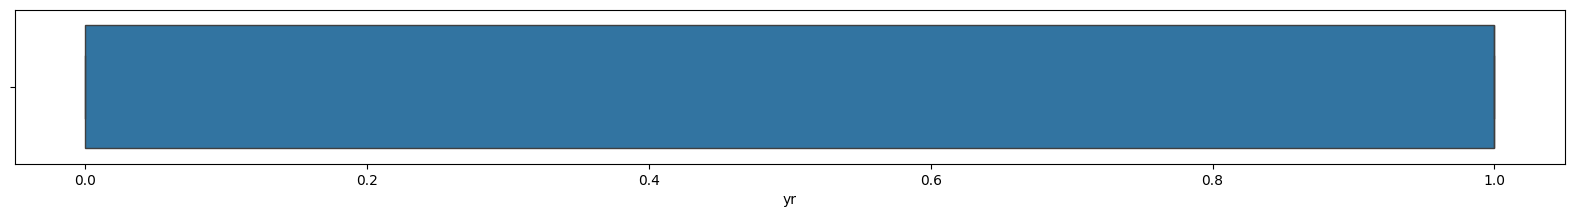

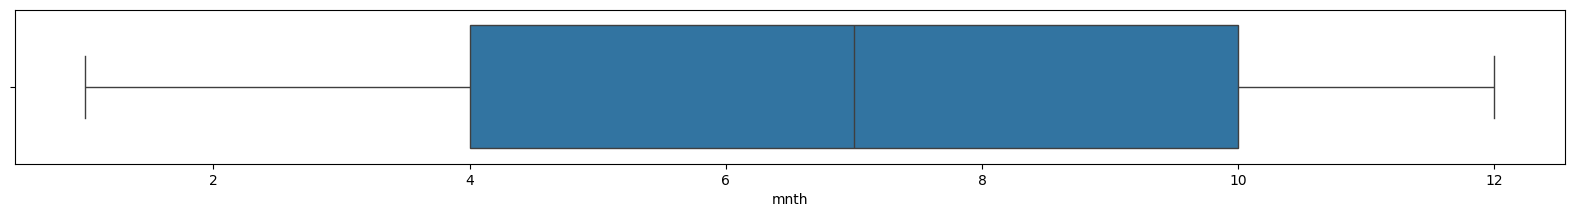

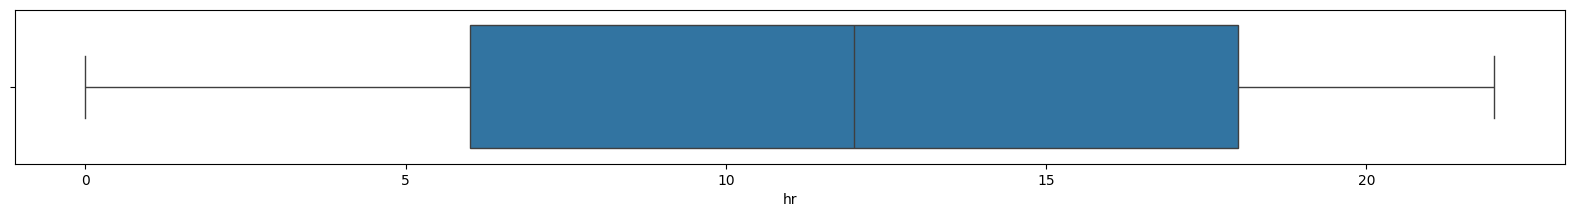

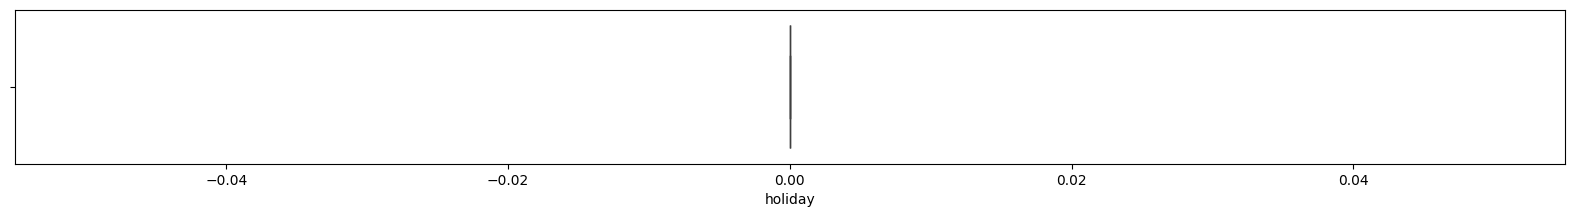

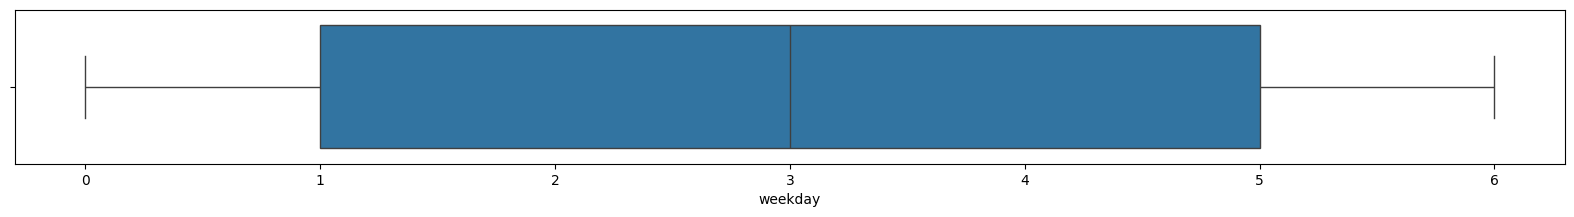

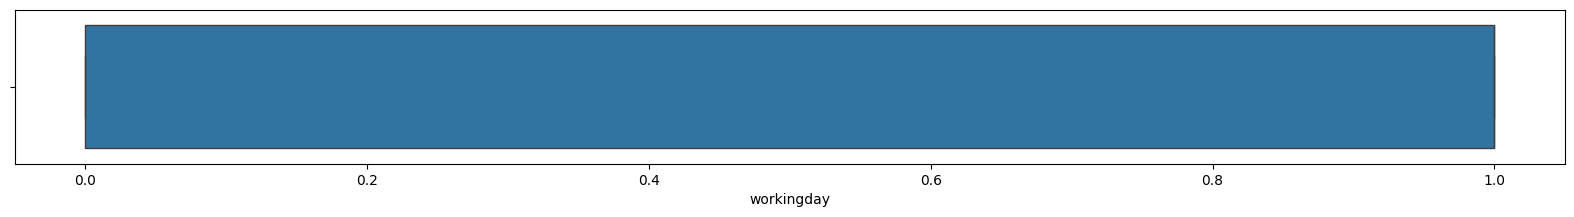

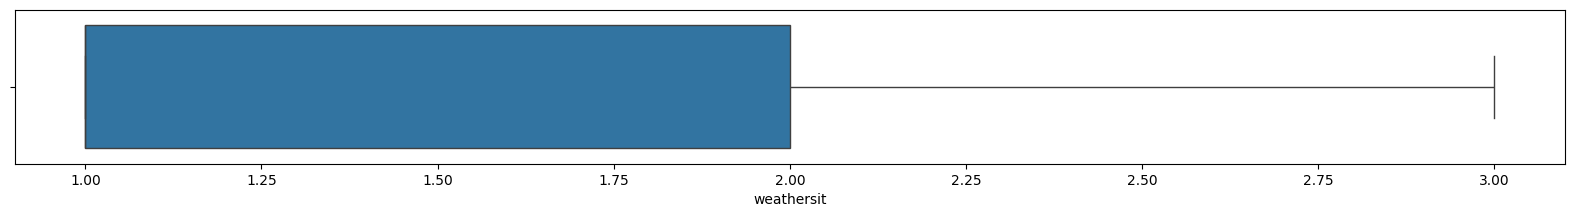

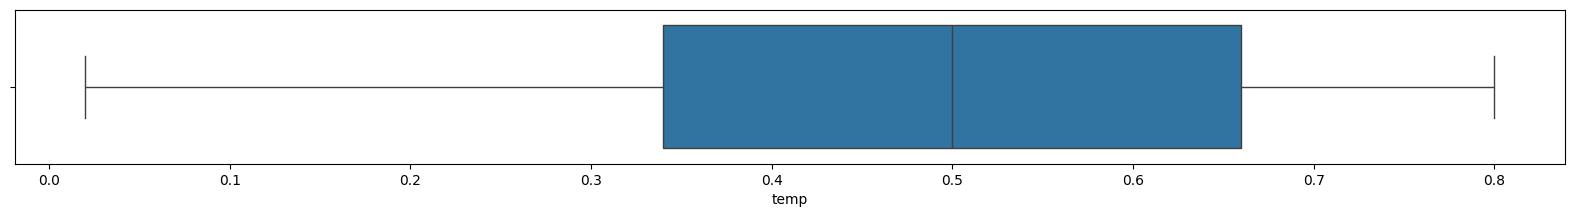

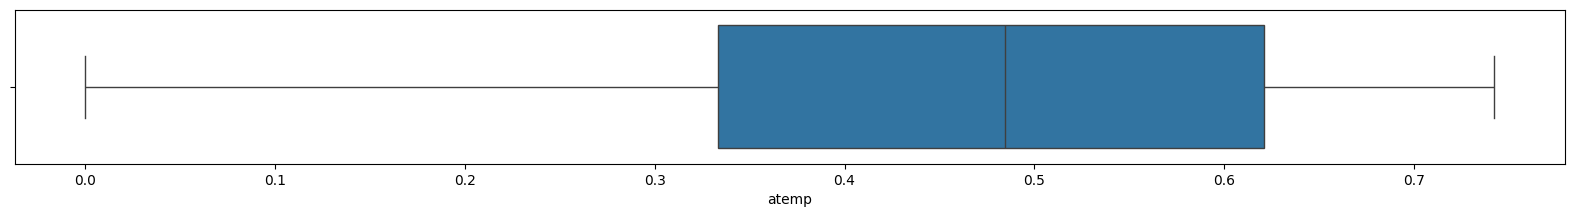

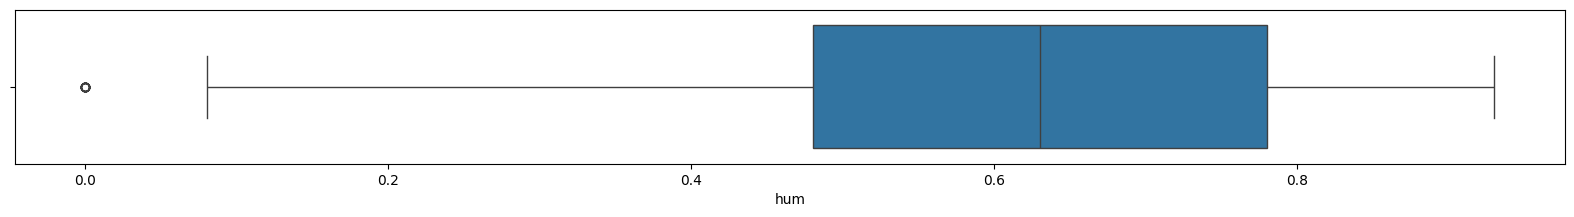

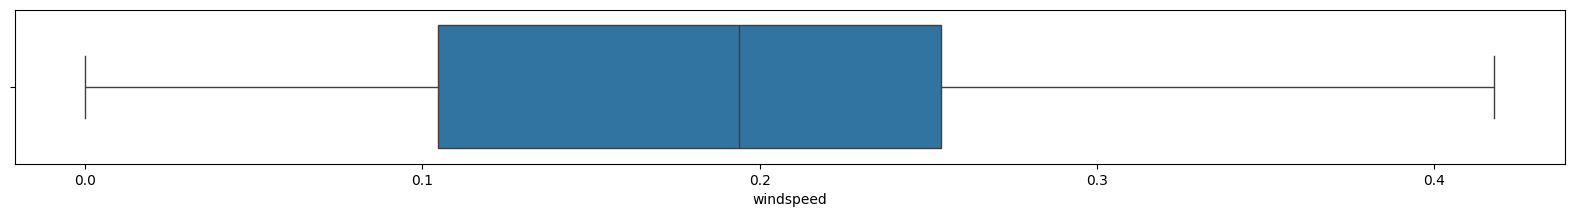

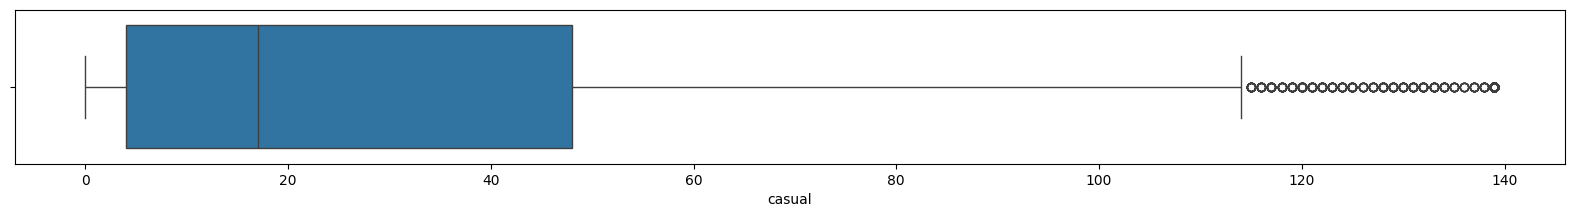

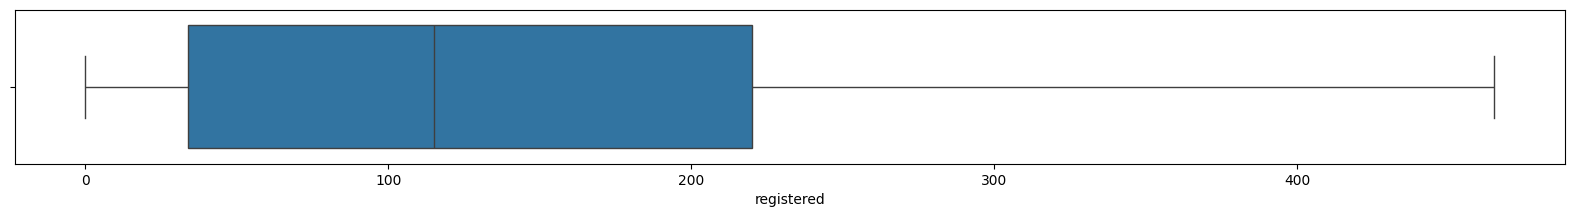

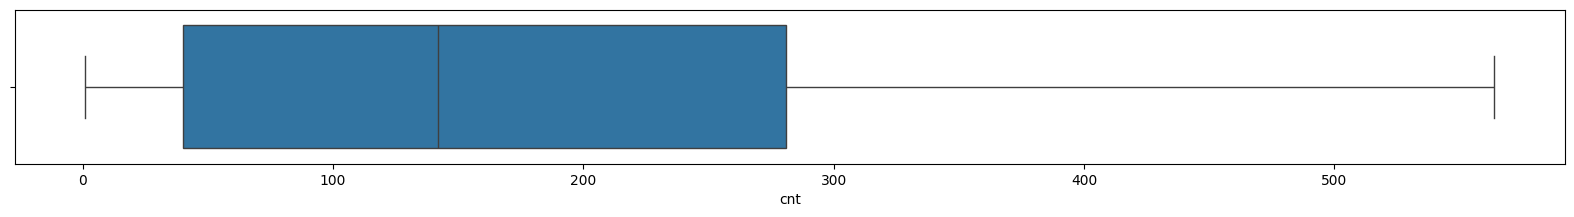

In [10]:
# menghilangkan data outlier dengan winsorize 
for col in df : 
    df[col] = winsorize(df[col], limits=[0,0.05])
    plt.figure(figsize=(20,2))
    sns.boxplot(data=df, x=col)

**Insight:**
- variabel yang memiliki inconsisten values yaitu 'dteday' diubah tipe datanya yang sebelumnya bertipe data object menjadi bertipe data datetime. Ini dilakukan karena dteday berisi tanggal diambilnya data sehingga seharusnya diubah menjadi tipe data tanggal bukan teks
- variabel dalam dataset yang memiliki outlier, dan outlier tersebut dihilangkan dengan menggunakan winsorize dimana winsorize adalah teknik statistik untuk menangani data ekstrem (outlier) dengan cara mengganti nilai-nilai di luar persentil tertentu dengan nilai yang ada di batas persentil tersebut.

## Exploratory Data Analysis (EDA)

### Explore data holiday

In [11]:
df.describe()

C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partit

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8668.298751,2012-01-01 06:09:23.024339456,2.501640,0.502561,6.537775,11.504862,0.0,3.003683,0.682721,1.425111,0.494566,0.473511,0.625812,0.186839,32.618102,147.132459,183.357961
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.500000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.0,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.000000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.0,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.500000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.0,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,16511.000000,2012-11-25 00:00:00,4.000000,1.000000,12.000000,22.000000,0.0,6.000000,1.000000,3.000000,0.800000,0.742400,0.930000,0.417900,139.000000,465.000000,564.000000
std,4981.774565,NaN,1.106918,0.500008,3.438776,6.847593,0.0,2.005771,0.465431,0.638796,0.188151,0.167714,0.190479,0.114115,38.549156,131.572388,164.523428


In [12]:
# efek libur terhadap penyewa 
libur = df.groupby(['weekday']).agg({
    'cnt':'sum'
})
libur

,cnt
weekday,
0,438805
1,439841
2,449822
3,451572
4,464238
5,474703
6,467597


In [13]:
libur.to_csv('data_liburan.csv', index=False)

In [14]:
df.to_csv('data.csv', index=False)

In [15]:
bulan = df.groupby(['mnth']).agg({
    'casual' : 'sum', 
    'registered' : 'sum'
}).reset_index()
bulan

,mnth,casual,registered
0,1,12015,122595
1,2,14753,135292
2,3,40626,177794
3,4,53078,200360
4,5,66386,245868
5,6,67377,259658
6,7,73187,253561
7,8,68722,261765
8,9,61725,257272
9,10,52734,245995


In [16]:
bulan.to_csv('bulan.csv', index=False)

**Insight:**
- pada deskripsi statistik data , dapat dilihat bahwa peminjaman sepeda baik casual, maupun registered memiliki angka peminjaman paling besar yaitu bernilai 564 buah perjam, sedangkan peminjaman paling sedikit bernilai 1 buah per jam
- diketahui peminjaman sepeda paling banyak dilakukan pada hari sabtu yaitu senilai 474703, sedangkan peminjaman sepeda paling sedikit dilakukan pada hari senin senilai 438805
- menurut data diketahui bahwa peminjam sepeda casual memiliki nilai yang lebih sedikit dibandingkan dengan pemeinjam sepeda yang sudah registrasi
- berdasarkan bulan, peminjam sepeda casual paling sedikit berada di bulan Januari senilai 12015 dan peminjam sepeda yang sudah registrasi paling sedikit berada dibulan Januari senilai 122595
- berdasarkan bulan, peminjam sepeda casual paling banyak berada di bulan Juli senilai 73187 dan peminjam sepeda yang sudah registrasi paling banyak berada dibulan Agustus senilai 261765

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa variabel "weekday" berefek dengan peminjaman sepeda selama tahun 2011 - 2012 ?

Text(0, 0.5, 'Count')

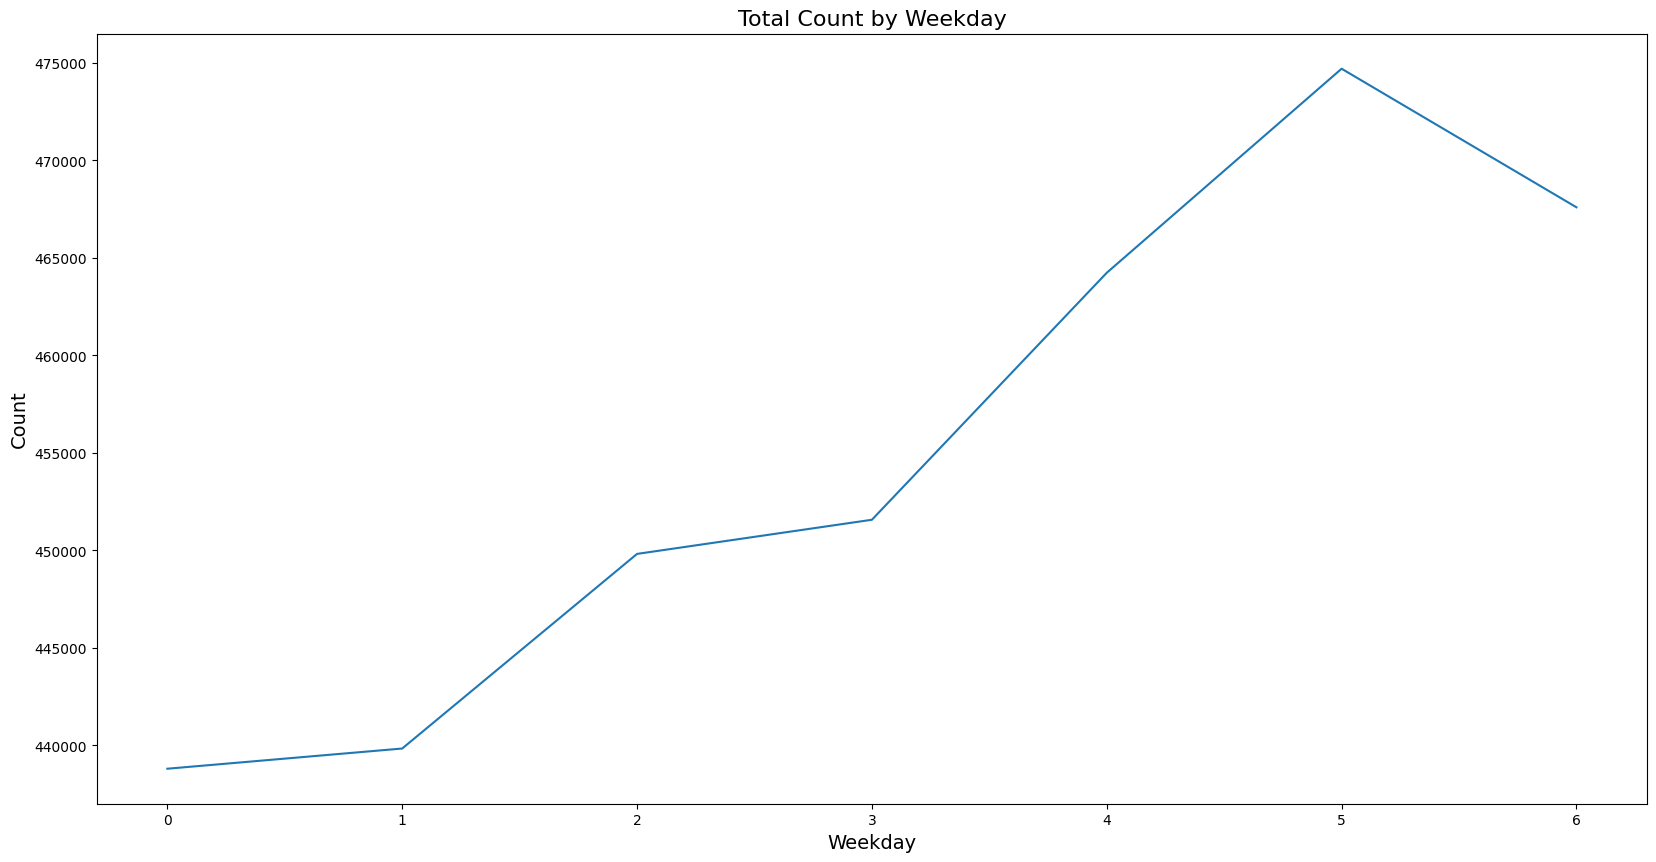

In [17]:
# bentuk visualisasi 
lib = libur.reset_index()
plt.figure(figsize=(20,10))
sns.lineplot(data=lib, x='weekday', y='cnt')
plt.title('Total Count by Weekday', fontsize=16)  
plt.xlabel('Weekday', fontsize=14)               
plt.ylabel('Count', fontsize=14)   

### Pertanyaan 2: Bagaimana performa perkembangan peminjam sepeda baik secara casual maupun registered selama tahun 2011 hingga tahun 2012 berdasarkan bulan?

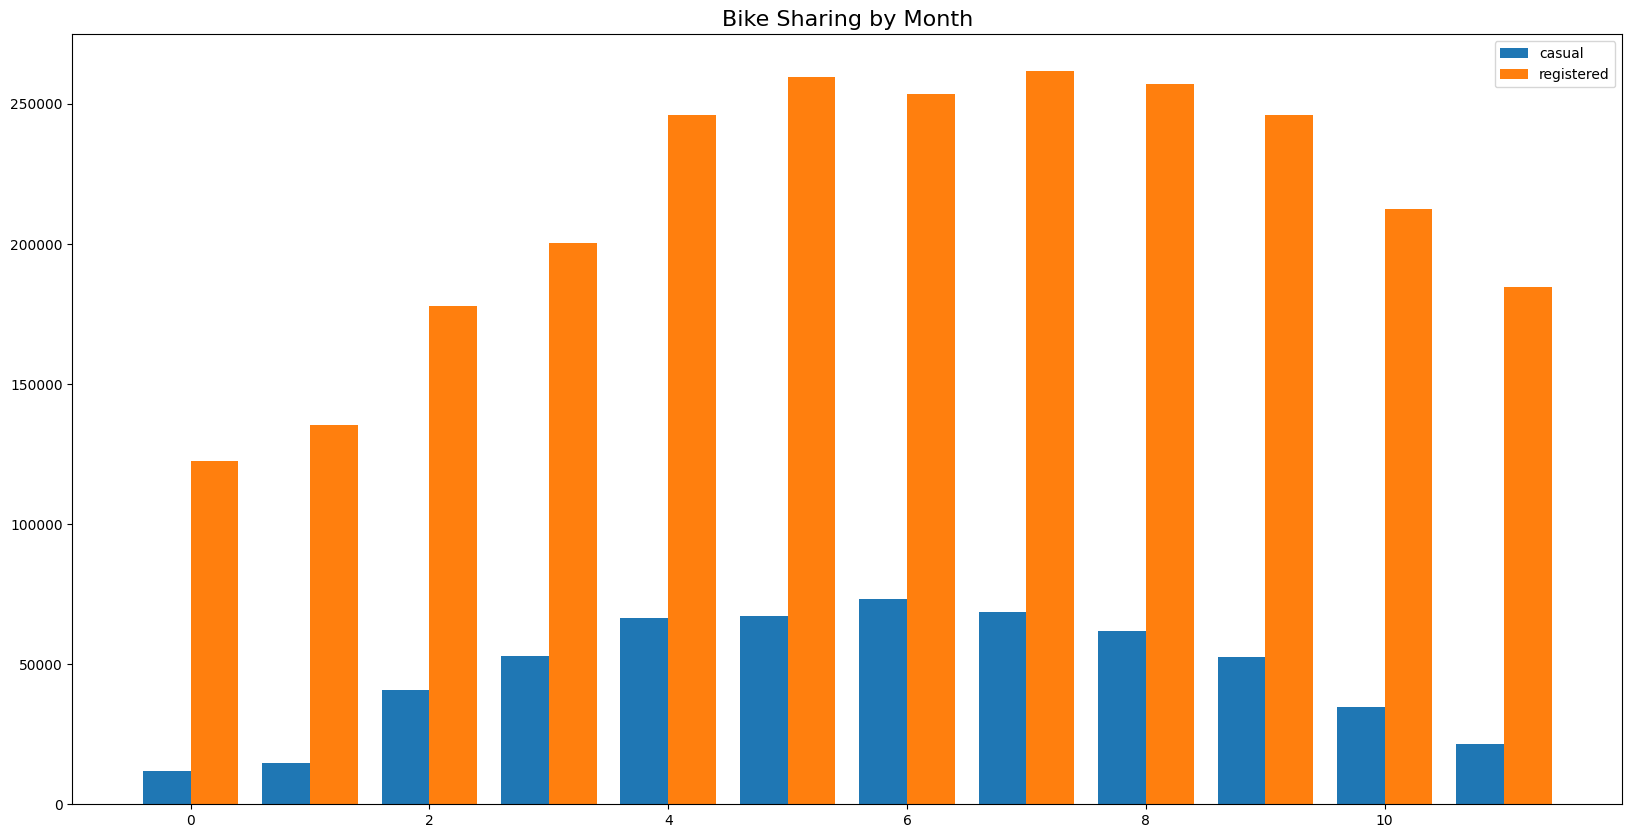

In [18]:
# visualisasi pertanyaan ke 2 
x = np.arange(len(bulan['mnth']))
width=0.4
plt.figure(figsize=(20,10))
plt.bar(x-width/2, bulan['casual'], width, label='casual')
plt.bar(x+width/2, bulan['registered'], width, label='registered')
plt.title('Bike Sharing by Month', fontsize=16)
plt.legend()

**Insight:**
- diketahui bahwa peminjaman sepeda selama tahun 2011 - 2012 memiliki peningkatan yang signifikan disetiap harinya khususnya dihari sabtu yang memiliki nilai peminjaman sepeda paling besar dibandinkan dengan hari lainnya
- diketahui bahwa peminjam sepeda yang sudah teregistrasi memiliki nilai yang lebih banyak dibandingkan peminjam sepeda casual,
- perkembangan peminjam sepeda setiap bulan ditahun 2011 - 2012 pada peminjaman sepeda yang sudah teregistrasi mengalami peningkatan paling tinggi di bulan ke 6 dan mengalami penurunan pada bulan 9

## Conclusion

 - hubungan variabel 'weekday' terhadap peminjaman sepeda pada tahun 2011 - 2012 memiliki hari peminjaman terbanyak di hari sabtu sehingga diketahui bahwa peminjaman sepeda dan variabel 'weekday' saling berhubungan dimana diketahui bahwa peminjaman sepeda selalu meningkat disetiap harinya 
- kesimpulan yang didapatkan dari data ini yaitu performa perkembangan peminjaman sepeda di tahun 2011 -2012 memiliki performa yang stabil dan diketahui bahwa peminjam sepeda yang teregistrasi memiliki jumlah yang lebih banyak dibandingkan dengan peminjam casual

<h1> RFM ANALYSIS</h1>

In [20]:
df['dteday'] = pd.to_datetime(df['dteday'])  # Convert date to datetime format

last_rental_date = df['dteday'].max()
df['recency'] = (last_rental_date - df['dteday']).dt.days

df['frequency'] = df.groupby('dteday')['instant'].transform('count')
 
df['monetary'] = df['cnt']

rfm_df = df[['dteday', 'recency', 'frequency', 'monetary']].drop_duplicates()
rfm_df

,dteday,recency,frequency,monetary
0,2011-01-01,694,24,16
1,2011-01-01,694,24,40
2,2011-01-01,694,24,32
3,2011-01-01,694,24,13
4,2011-01-01,694,24,1
...,...,...,...,...
17306,2012-11-25,0,885,59
17321,2012-11-25,0,885,98
17349,2012-11-25,0,885,125
17351,2012-11-25,0,885,72
